<a href="https://colab.research.google.com/github/erikmdp/Telecom-X-2/blob/main/Telecom2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd

# Cargar el dataframe
df = pd.read_csv('https://raw.githubusercontent.com/erikmdp/Telecom-X-2/refs/heads/main/telecom_dataframe.csv', sep=';')

# Eliminar la columna 'customerID'
df = df.drop(columns=['customerID'])

df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# 1. Codificar la variable objetivo (Churn)
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])  # No=0, Yes=1

# 2. One-hot encoding para variables categóricas nominales
categorical_cols = [
    'customer.gender', 'phone.PhoneService', 'phone.MultipleLines',
    'internet.InternetService', 'internet.OnlineSecurity',
    'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV',
    'internet.StreamingMovies', 'account.PaperlessBilling',
    'account.PaymentMethod', 'account.Contract'
]

# Aplicar one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



# Verificar resultados
print(df_encoded.head())
print("\nColumnas después de encoding:", df_encoded.columns.tolist())

# Guardar el dataset transformado
df_encoded.to_csv('telecom_data_encoded.csv', index=False)

   Churn  customer.SeniorCitizen customer.Partner customer.Dependents  \
0      0                       0              Yes                 Yes   
1      0                       0               No                  No   
2      1                       0               No                  No   
3      1                       1              Yes                  No   
4      1                       1              Yes                  No   

   customer.tenure  account.Charges.Monthly account.Charges.Total  \
0                9                     65.6                 593.3   
1                9                     59.9                 542.4   
2                4                     73.9                280.85   
3               13                     98.0               1237.85   
4                3                     83.9                 267.4   

   customer.gender_Male  phone.PhoneService_Yes  \
0                 False                    True   
1                  True                    T

In [8]:
churn_distribution = df_encoded['Churn'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Distribución de clases (%):")
print(churn_distribution)

print("\nConteo absoluto:")
print(df_encoded['Churn'].value_counts())

Distribución de clases (%):
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

Conteo absoluto:
Churn
0    5174
1    1869
Name: count, dtype: int64


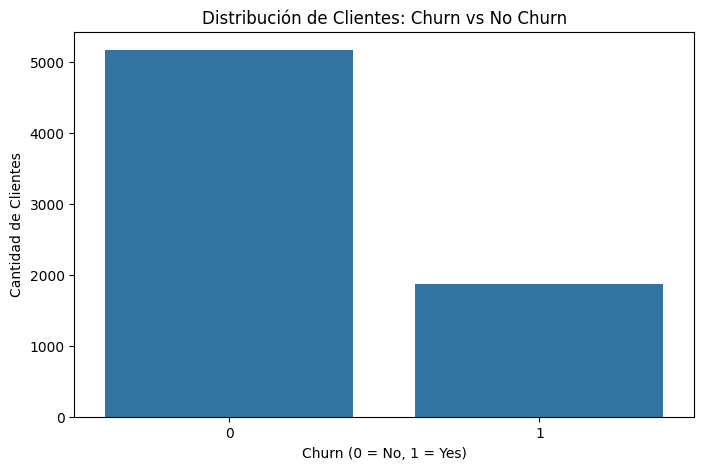

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df_encoded)
plt.title('Distribución de Clientes: Churn vs No Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Cantidad de Clientes')
plt.show()

Los datos presentan un desbalance moderado que hay que tener en cuenta

Visualizar la matriz de correlación

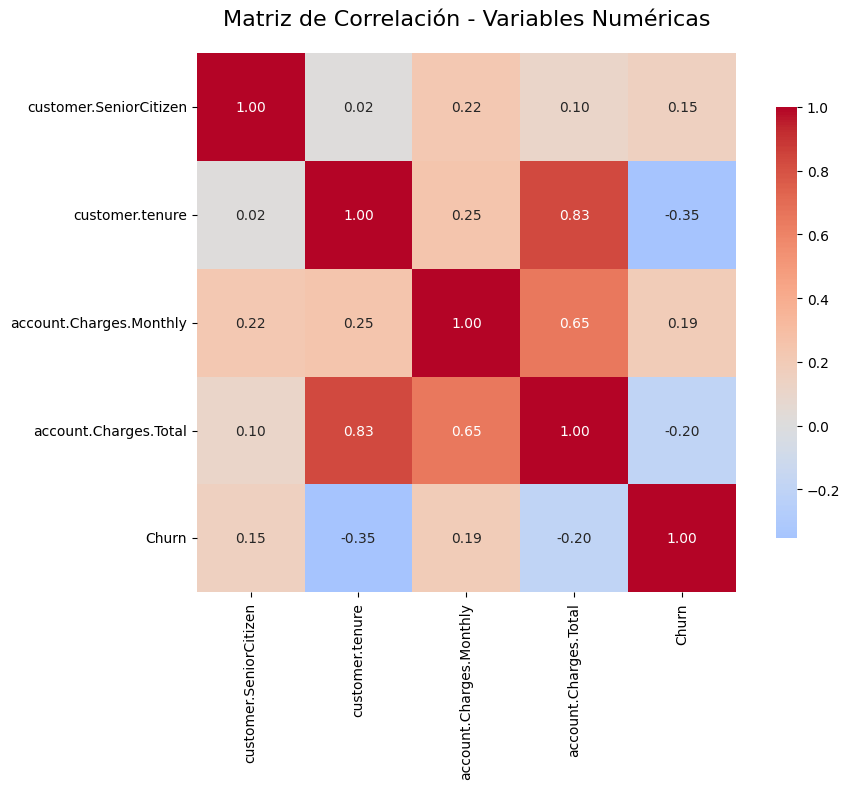

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Eliminar filas con valores no numéricos
df_clean = df_encoded.copy()
df_clean['account.Charges.Total'] = pd.to_numeric(df_clean['account.Charges.Total'], errors='coerce')
df_clean = df_clean.dropna(subset=['account.Charges.Total'])



# Codificar variable objetivo
le = LabelEncoder()
df_clean['Churn'] = le.fit_transform(df_clean['Churn'])  # No=0, Yes=1

# Seleccionar solo variables numéricas para la matriz de correlación
numeric_columns = ['customer.SeniorCitizen', 'customer.tenure',
                   'account.Charges.Monthly', 'account.Charges.Total', 'Churn']

numeric_df = df_clean[numeric_columns]

# Calcular matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

Análisis de correlación con la variable objetivo (churn)

Correlación de variables con Churn:
account.Charges.Monthly  :  0.193
customer.SeniorCitizen   :  0.151
account.Charges.Total    : -0.199
customer.tenure          : -0.354


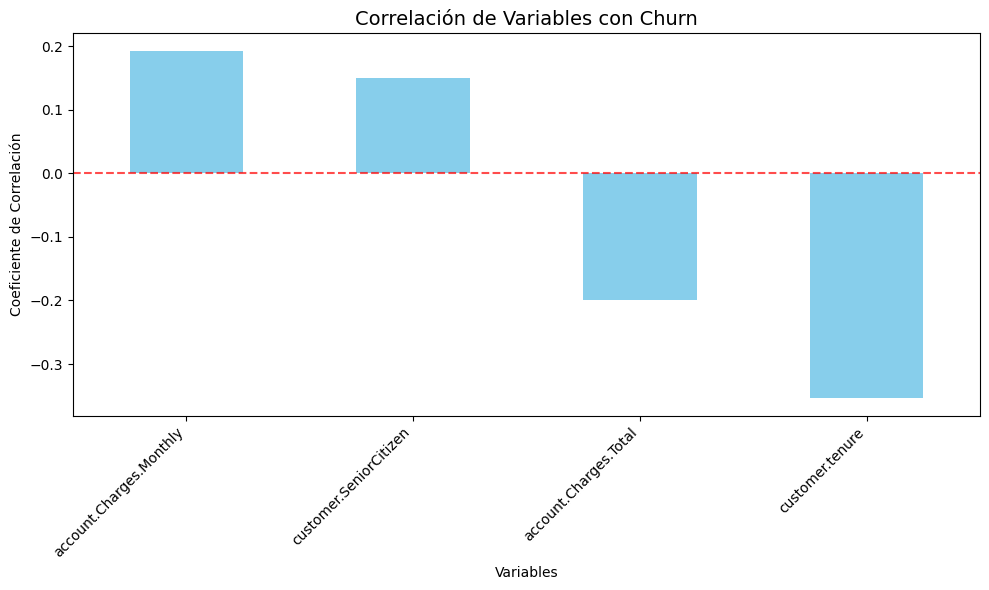

In [14]:
# Correlaciones específicas con Churn
churn_correlations = correlation_matrix['Churn'].sort_values(ascending=False)

print("Correlación de variables con Churn:")
print("=" * 40)
for variable, correlation in churn_correlations.items():
    if variable != 'Churn':
        print(f"{variable:25}: {correlation:6.3f}")

# Visualizar correlaciones con Churn
plt.figure(figsize=(10, 6))
churn_correlations.drop('Churn').plot(kind='bar', color='skyblue')
plt.title('Correlación de Variables con Churn', fontsize=14)
plt.xlabel('Variables')
plt.ylabel('Coeficiente de Correlación')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Visualización de relaciones individuales

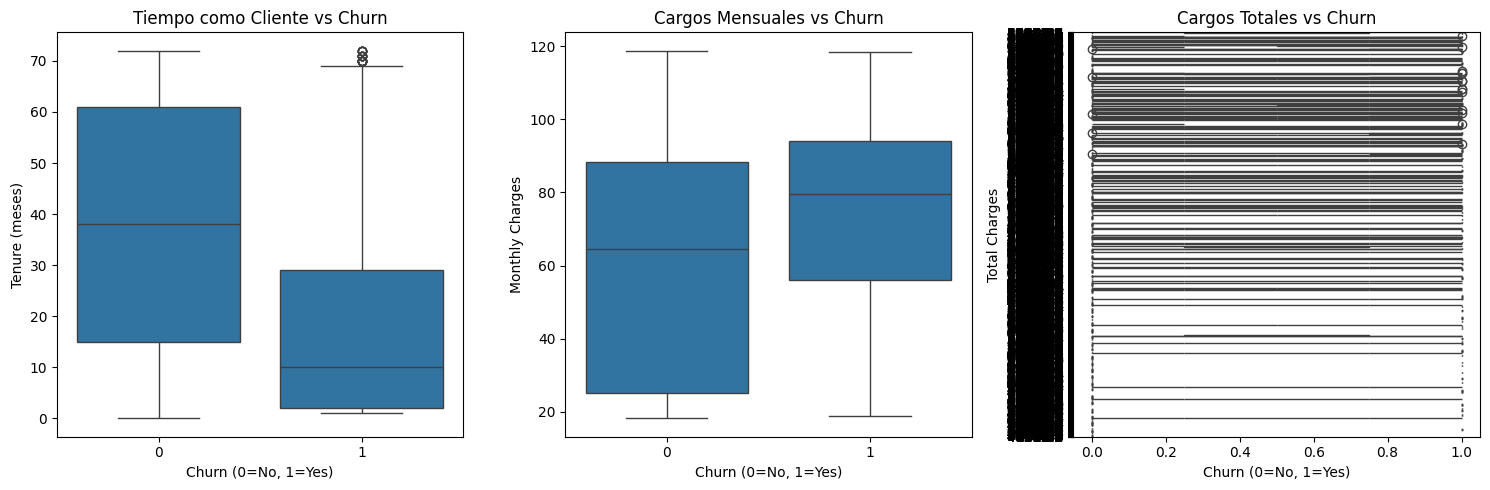

In [15]:
# Scatter plots para las variables más correlacionadas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Tenure vs Churn
sns.boxplot(x='Churn', y='customer.tenure', data=df, ax=axes[0])
axes[0].set_title('Tiempo como Cliente vs Churn')
axes[0].set_xlabel('Churn (0=No, 1=Yes)')
axes[0].set_ylabel('Tenure (meses)')

# 2. Monthly Charges vs Churn
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=df, ax=axes[1])
axes[1].set_title('Cargos Mensuales vs Churn')
axes[1].set_xlabel('Churn (0=No, 1=Yes)')
axes[1].set_ylabel('Monthly Charges')

# 3. Total Charges vs Churn
sns.boxplot(x='Churn', y='account.Charges.Total', data=df, ax=axes[2])
axes[2].set_title('Cargos Totales vs Churn')
axes[2].set_xlabel('Churn (0=No, 1=Yes)')
axes[2].set_ylabel('Total Charges')

plt.tight_layout()
plt.show()

Análisis de variables categóricas

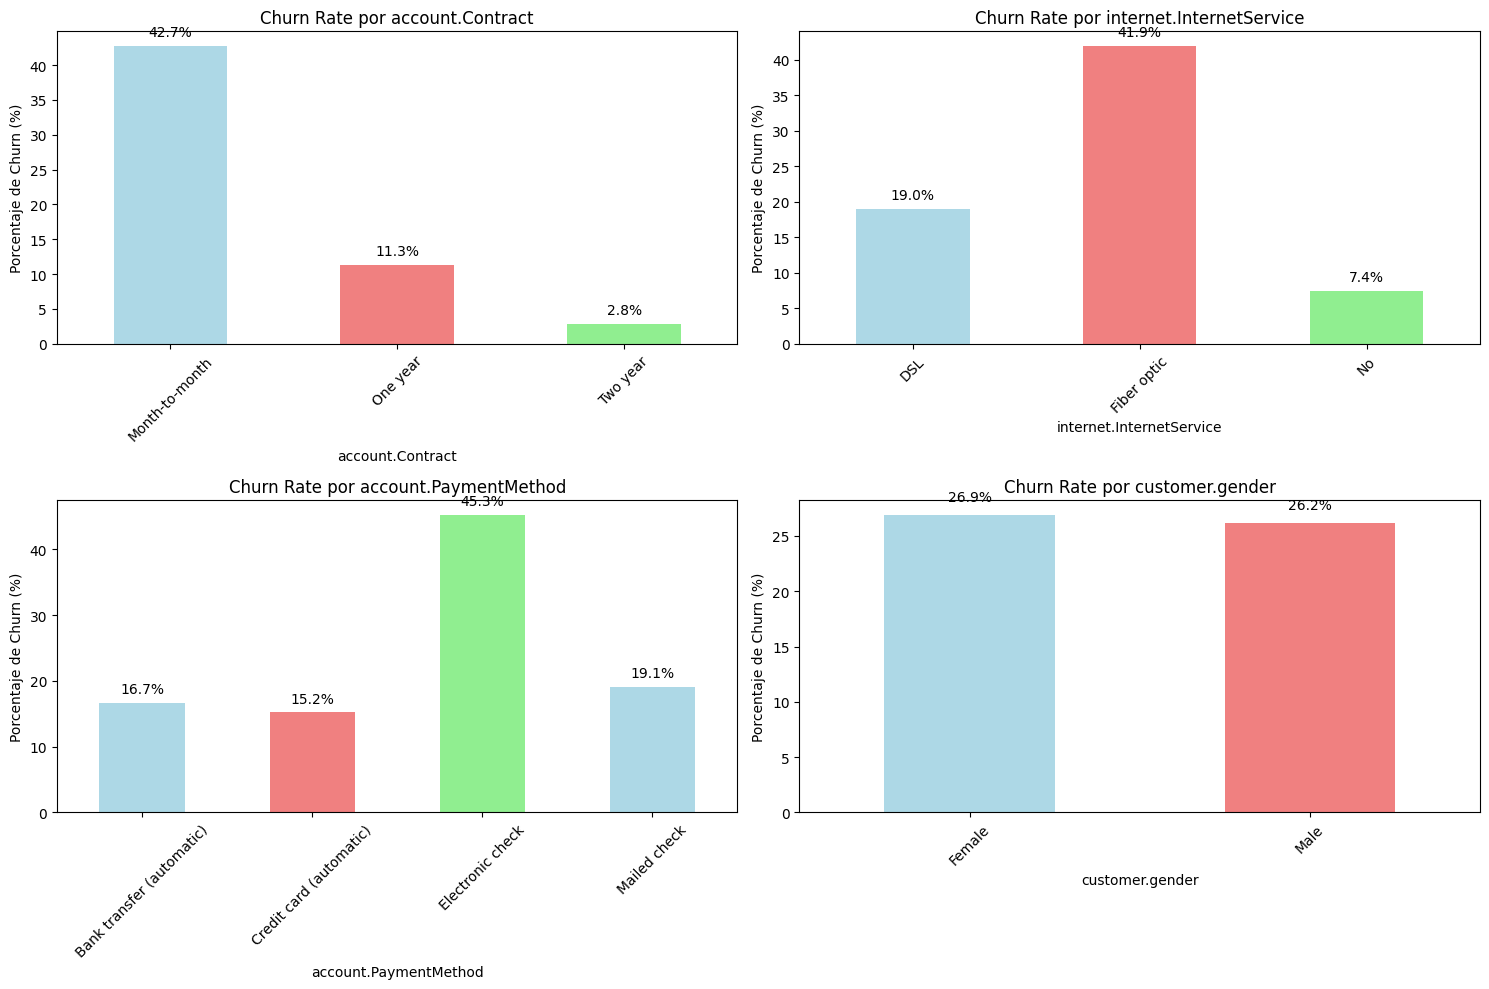

In [ ]:
# Analizar relación de variables categóricas importantes con Churn
categorical_vars = ['account.Contract', 'internet.InternetService',
                    'account.PaymentMethod', 'customer.gender']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    # Calcular porcentaje de churn por categoría
    churn_rate = df.groupby(var)['Churn'].mean() * 100

    # Crear gráfico de barras
    churn_rate.plot(kind='bar', ax=axes[i], color=['lightblue', 'lightcoral', 'lightgreen'])
    axes[i].set_title(f'Churn Rate por {var}')
    axes[i].set_ylabel('Porcentaje de Churn (%)')
    axes[i].set_xlabel(var)
    axes[i].tick_params(axis='x', rotation=45)

    # Añadir valores en las barras
    for j, v in enumerate(churn_rate):
        axes[i].text(j, v + 1, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Correlaciones

* customer.tenure            : -0.35  (Fuerte correlación negativa)

* account.Charges.Total      : -0.20  (Correlación negativa moderada)

* account.Charges.Monthly    :  0.19  (Correlación positiva moderada)

* customer.SeniorCitizen     :  0.15  (Correlación positiva débil)

#Resultaros principales:

1. **customer.tenure**: La correlación más fuerte (-0.35)
   - Los clientes con mayor antigüedad tienen menor probabilidad de dejar la empresa.
   - Variable muy prometedora para el modelo

2. **account.Charges.Total**: Correlación negativa (-0.20)
   - Clientes que han pagado más en total tienden a permanecer

3. **account.Charges.Monthly**: Correlación positiva (0.19)
   - Clientes con cargos mensuales más altos tienen mayor tendencia a dejar la empresa
   - Posiblemente relacionado con planes más costosos

4. **customer.SeniorCitizen**: Correlación positiva débil (0.15)
   - Los clientes mayores tienen una ligera mayor probabilidad de dejar la empresa

#Variables Candidatas para el Modelo Predictivo

**Variables numéricas fuertes:**
- `customer.tenure` (es la más correlacionada)
- `account.Charges.Monthly`
- `account.Charges.Total`

**Variables categóricas importantes:**
- `account.Contract` (clientes mensuales)
- `internet.InternetService` (fibra óptica)
- `account.PaymentMethod` (Cheque electrónico)

#Análisis de relaciones específicas con la cancelación.

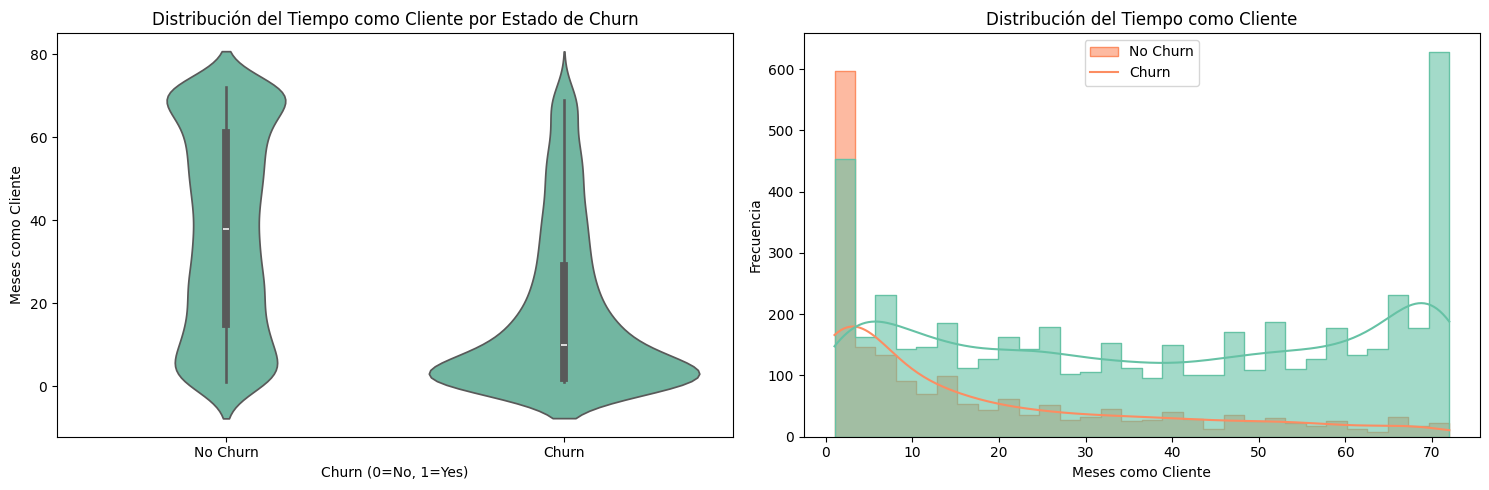

/tmp/ipython-input-184947674.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=['No Churn', 'Churn'])


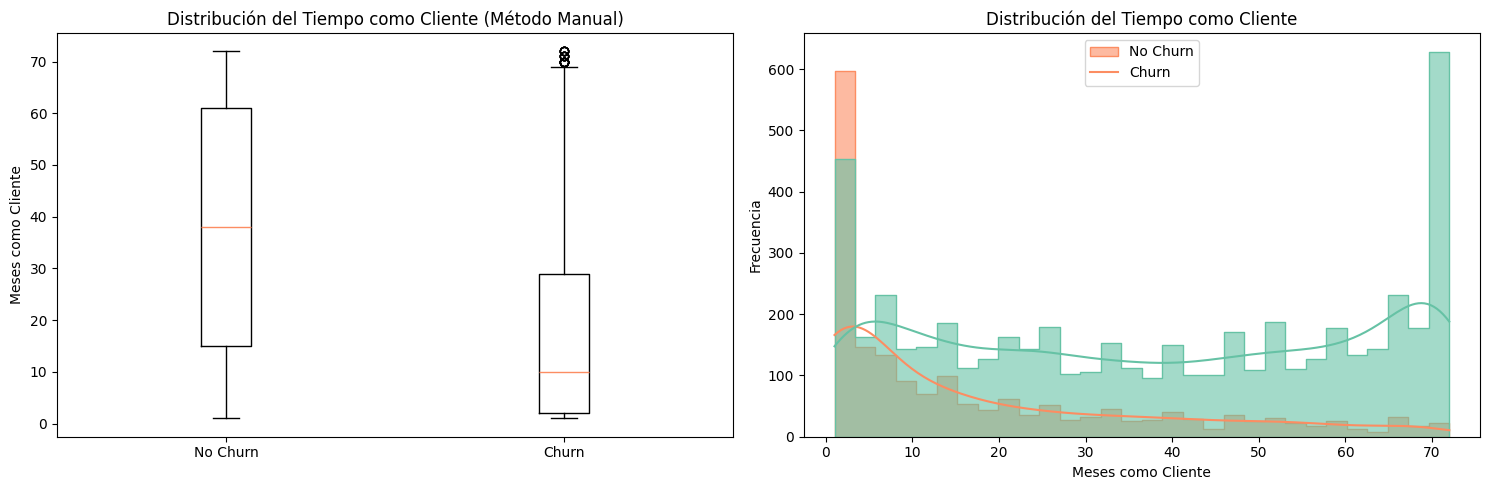


ESTADÍSTICAS - Tiempo como Cliente:
Clientes que NO cancelan:
  Media: 37.7 meses
  Mediana: 38.0 meses
  Desviación: 24.1 meses

Clientes que SÍ cancelan:
  Media: 18.0 meses
  Mediana: 10.0 meses
  Desviación: 19.5 meses


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo
plt.style.use('default')
sns.set_palette("Set2")



plt.figure(figsize=(15, 5))

# Violinplot
plt.subplot(1, 2, 1)
sns.violinplot(x='Churn', y='customer.tenure', data=df_clean)
plt.title('Distribución del Tiempo como Cliente por Estado de Churn')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Meses como Cliente')
plt.xticks([0, 1], ['No Churn', 'Churn'])

# Histograma comparativo
plt.subplot(1, 2, 2)
sns.histplot(data=df_clean, x='customer.tenure', hue='Churn',
             bins=30, alpha=0.6, kde=True, element='step')
plt.title('Distribución del Tiempo como Cliente')
plt.xlabel('Meses como Cliente')
plt.ylabel('Frecuencia')
plt.legend(['No Churn', 'Churn'])

plt.tight_layout()
plt.show()
# Crear boxplots manualmente separando los datos
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
# Separar datos manualmente
tenure_no_churn = df_clean[df_clean['Churn'] == 0]['customer.tenure']
tenure_churn = df_clean[df_clean['Churn'] == 1]['customer.tenure']

# boxplot manual
box_data = [tenure_no_churn, tenure_churn]
plt.boxplot(box_data, labels=['No Churn', 'Churn'])
plt.title('Distribución del Tiempo como Cliente (Método Manual)')
plt.ylabel('Meses como Cliente')

plt.subplot(1, 2, 2)
sns.histplot(data=df_clean, x='customer.tenure', hue='Churn',
             bins=30, alpha=0.6, kde=True, element='step')
plt.title('Distribución del Tiempo como Cliente')
plt.xlabel('Meses como Cliente')
plt.ylabel('Frecuencia')
plt.legend(['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

# ESTADÍSTICAS DESCRIPTIVAS
print("\nESTADÍSTICAS - Tiempo como Cliente:")
print("=" * 40)
print("Clientes que NO cancelan:")
print(f"  Media: {tenure_no_churn.mean():.1f} meses")
print(f"  Mediana: {tenure_no_churn.median():.1f} meses")
print(f"  Desviación: {tenure_no_churn.std():.1f} meses")

print("\nClientes que SÍ cancelan:")
print(f"  Media: {tenure_churn.mean():.1f} meses")
print(f"  Mediana: {tenure_churn.median():.1f} meses")
print(f"  Desviación: {tenure_churn.std():.1f} meses")

#División del Conjunto de Datos en Entrenamiento y Prueba 70/30

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline







# Separar variables predictoras (X) y variable objetivo (y)
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

# Identificar tipos de variables
numeric_features = ['customer.SeniorCitizen', 'customer.tenure',
                   'account.Charges.Monthly', 'account.Charges.Total']

categorical_features = ['customer.gender', 'customer.Partner', 'customer.Dependents',
                       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
                       'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
                       'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
                       'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

# Verificar que todas las columnas existan
print("Variables numéricas:", numeric_features)
print("Variables categóricas:", categorical_features)
print(f"Total de características: {len(numeric_features) + len(categorical_features)}")

# Preprocesamiento: Pipeline para transformaciones
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Dividir el dataset en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,  # Semilla para reproducibilidad
    stratify=y  # Mantener proporción de clases en ambos conjuntos
)

print("=" * 50)
print("DIVISIÓN DEL DATASET COMPLETADA")
print("=" * 50)
print(f"Tamaño del dataset original: {len(df)} filas")
print(f"Tamaño del conjunto de entrenamiento: {len(X_train)} filas (70%)")
print(f"Tamaño del conjunto de prueba: {len(X_test)} filas (30%)")
print("\nDistribución de clases en conjunto completo:")
print(y.value_counts(normalize=True))
print("\nDistribución de clases en entrenamiento:")
print(y_train.value_counts(normalize=True))
print("\nDistribución de clases en prueba:")
print(y_test.value_counts(normalize=True))

Variables numéricas: ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
Variables categóricas: ['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']
Total de características: 19
DIVISIÓN DEL DATASET COMPLETADA
Tamaño del dataset original: 7043 filas
Tamaño del conjunto de entrenamiento: 4922 filas (70%)
Tamaño del conjunto de prueba: 2110 filas (30%)

Distribución de clases en conjunto completo:
Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

Distribución de clases en entrenamiento:
Churn
0    0.734254
1    0.265746
Name: proportion, dtype: float64

Distribución de clases en prueba:
Churn
0    0.734123
1    0.2658

#Cración de modelos

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


# Separar variables
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Definir variables
numeric_features = ['customer.SeniorCitizen', 'customer.tenure',
                   'account.Charges.Monthly', 'account.Charges.Total']

categorical_features = ['customer.gender_Male', 'customer.Partner', 'customer.Dependents',
                       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
                       'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
                       'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
                       'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

# Preprocesadores
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])